building model with cifar10 dataset

This file written and ran on google colab

(617, 256, 256, 1)
(617, 1)
(193, 256, 256, 1)
(193, 1)
x_train shape (617, 256, 256, 1)
617 train samples
193 test samples
256
256
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 256, 256, 32)      832       
                                                                 
 activation_15 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 128, 128, 32)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 126, 126, 32)      9248      
                                                      

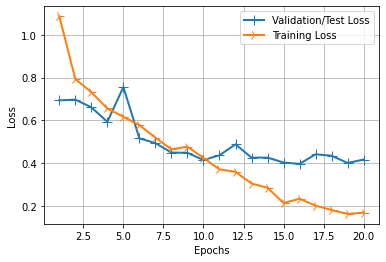

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import tensorflow as ts

def load_data(dir,datasetname):
    npzfile = np.load(dir + datasetname + "_training_data.npz")
    train = npzfile["arr_0"]
    
    npzfile = np.load(dir + datasetname + "_training_labels.npz")
    train_labels = npzfile["arr_0"]
    
    npzfile = np.load(dir + datasetname + "_test_data.npz")
    test = npzfile["arr_0"]
    
    npzfile = np.load(dir + datasetname + "_test_labels.npz")
    test_labels = npzfile["arr_0"]
    
    return (train,train_labels), (test, test_labels)



def data_prep(dir, datasetname):
    
    (train,train_labels), (test, test_labels) =  load_data(dir, datasetname)
    
    img_rows = train[0].shape[0]
    img_cols = train[1].shape[0]
    
    train = train.reshape(train.shape[0], img_rows, img_cols, 1)
    test = test.reshape(test.shape[0], img_rows, img_cols, 1)

    train_labels = train_labels.reshape(train_labels.shape[0],1)
    test_labels = test_labels.reshape(test_labels.shape[0],1)
    
    train = train.astype("float32")
    test = test.astype("float32")
    
    train /=255
    test/=255

    print(train.shape)
    print(train_labels.shape)
    print(test.shape)
    print(test_labels.shape)

    return (train,train_labels), (test, test_labels)



# from __future__ import print_function
from keras.layers.normalization.batch_normalization import BatchNormalization
#╔from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras.utils import np_utils
from tensorflow.keras import optimizers
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from keras import backend as K
from tensorflow.keras.optimizers import SGD

#loads the buoy dataset
(x_train,y_train), (x_test, y_test) =  data_prep("/content/drive/MyDrive/t_dataset/","buoy")



batch_size = 8
epochs = 20

"""
nb_train_samples = 617
nb_validation_samples = 193"""

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
input_shape = (img_rows, img_cols,1)

img_width = img_rows
img_height = img_cols

#display our data shape/dimensions
print("x_train shape",x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")
print(img_rows)
print(img_cols)

# now we  "one hot encode" outputs
# y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
"""
for i in range(1,11):
    random = np.random.randint(0, 617)
    input_im=x_train[random]

    cv2_imshow(input_im)
   
    if y_train[random] == 0:
        print( "buoy")
    else:
        print("none")
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

"""


"""
train_data_dir = '/content/drive/MyDrive/t_dataset/train/'
validation_data_dir = '/content/drive/MyDrive/t_dataset/validation'


# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations
      width_shift_range = 0.1,       # randomly applies width shifting
      height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = True,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)   """




model = Sequential()
#padding = "same" results in padding the input such that
#the output has the same length as the original input

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape,padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
                     
checkpoint = ModelCheckpoint("/content/buoy_check_lenet.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 6,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 4,
                              verbose = 1,
                              min_delta = 0.00001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss = "binary_crossentropy",
              optimizer = 'rmsprop',
              metrics = ["accuracy"])



#create model


print(model.summary())

history=model.fit(x_train,
                  y_train, 
                  batch_size=batch_size,
                  epochs=epochs,
                  callbacks = callbacks, 
                  validation_data = (x_test, y_test),
                  shuffle = True)


"""
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples// batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples//batch_size)"""

scores = model.evaluate(x_test, y_test, verbose=1)
print("test loss:",scores[0])
print("test acc:",scores[1])




history_dict = history.history
 
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epocs = range(1,len(loss_values)+1)


line1=plt.plot(epocs, val_loss_values, label="Validation/Test Loss")
line2=plt.plot(epocs, loss_values, label="Training Loss")
plt.setp(line1, linewidth=2.0, marker = "+", markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = "4", markersize=10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()



(617, 256, 256, 1)
(617, 1)
(193, 256, 256, 1)
(193, 1)
********** 
[0.00474995]
0


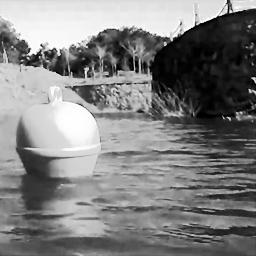

--- 0.15149307250976562 seconds ---
********** 
[9.039107e-07]
0


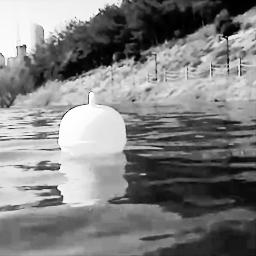

--- 0.0961000919342041 seconds ---
********** 
[0.4904475]
0


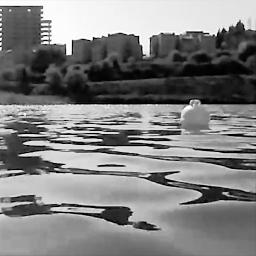

--- 0.07552242279052734 seconds ---
********** 
[0.10742321]
1


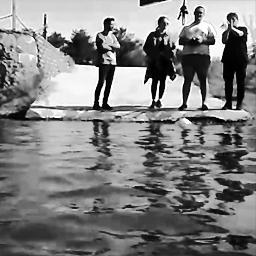

--- 0.08499479293823242 seconds ---
********** 
[0.05391981]
1


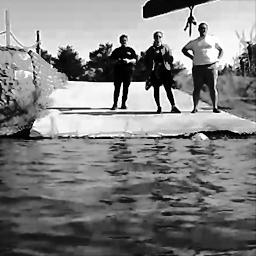

--- 0.08566904067993164 seconds ---
********** 
[0.34279668]
0


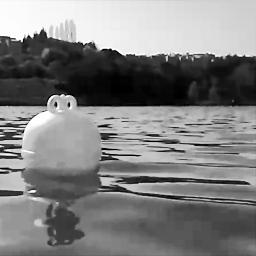

--- 0.09090733528137207 seconds ---
********** 
[0.84948087]
0


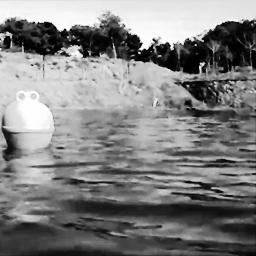

--- 0.08710575103759766 seconds ---
********** 
[0.00166077]
0


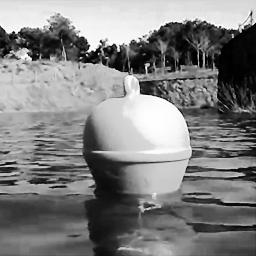

--- 0.08490753173828125 seconds ---
********** 
[0.9429692]
1


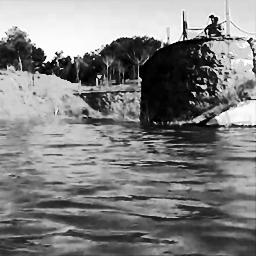

--- 0.11707401275634766 seconds ---
********** 
[0.6002946]
0


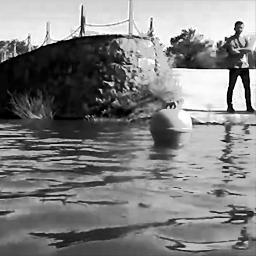

--- 0.09642529487609863 seconds ---
********** 
[0.99080503]
1


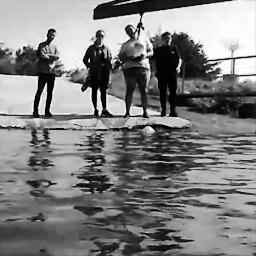

--- 0.0826263427734375 seconds ---
********** 
[0.7898482]
1


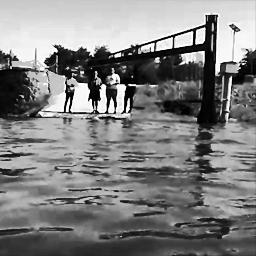

--- 0.10175848007202148 seconds ---
********** 
[1.8971805e-05]
0


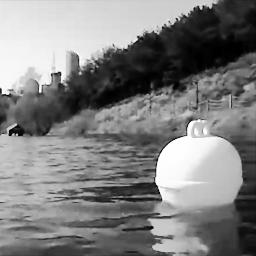

--- 0.08968830108642578 seconds ---
********** 
[0.9906116]
1


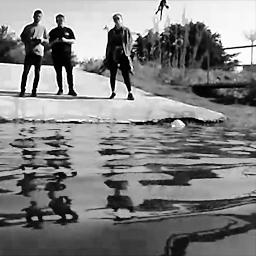

--- 0.09490966796875 seconds ---
********** 
[0.67631567]
1


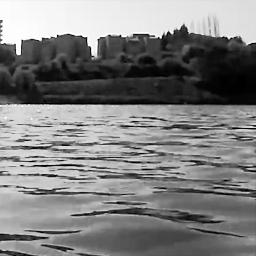

--- 0.10931968688964844 seconds ---
********** 
[0.540088]
0


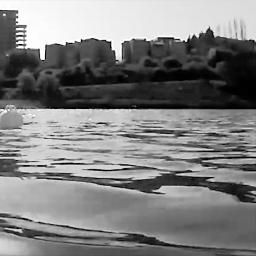

--- 0.1518404483795166 seconds ---
********** 
[0.31930664]
0


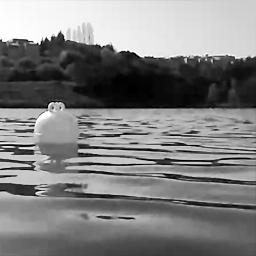

--- 0.22814083099365234 seconds ---
********** 
[0.02939596]
0


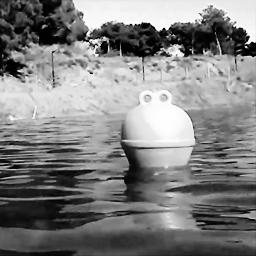

--- 0.2156987190246582 seconds ---
********** 
[0.686635]
1


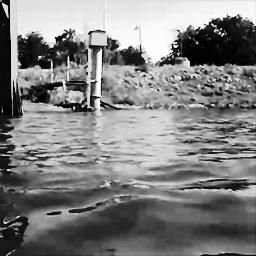

--- 0.1356525421142578 seconds ---
********** 
[0.98925376]
1


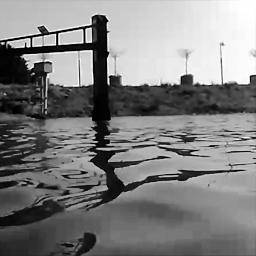

--- 0.08668351173400879 seconds ---
********** 
[0.9468054]
1


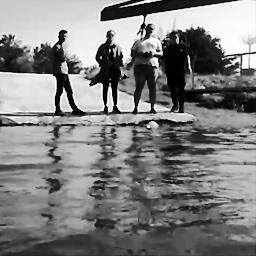

--- 0.0925297737121582 seconds ---
********** 
[0.00563816]
0


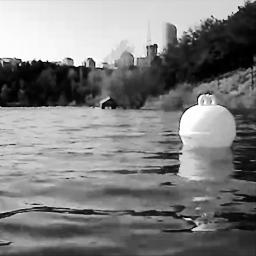

--- 0.09971761703491211 seconds ---
********** 
[0.08808969]
0


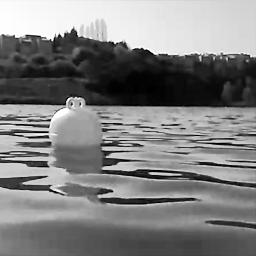

--- 0.11546635627746582 seconds ---
********** 
[0.8608886]
1


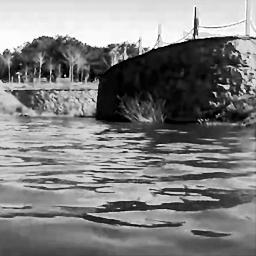

--- 0.1023263931274414 seconds ---
********** 
[0.00263276]
0


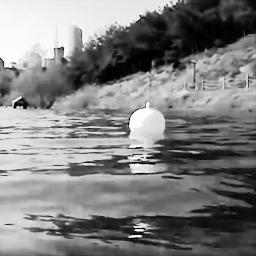

--- 0.09928727149963379 seconds ---
********** 
[0.13585919]
0


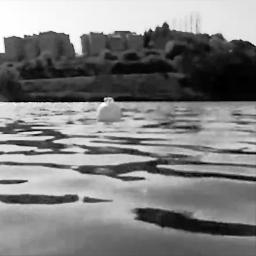

--- 0.08997583389282227 seconds ---
********** 
[0.8488694]
1


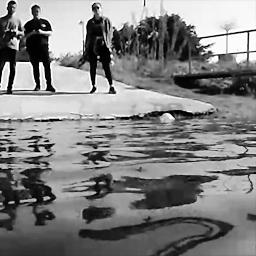

--- 0.10134100914001465 seconds ---
********** 
[0.69424754]
0


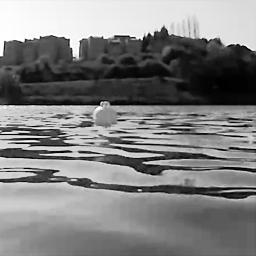

--- 0.10004472732543945 seconds ---
********** 
[0.00059493]
0


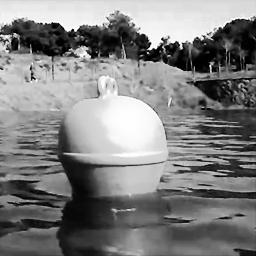

--- 0.10759568214416504 seconds ---
********** 
[1.6334171e-09]
0


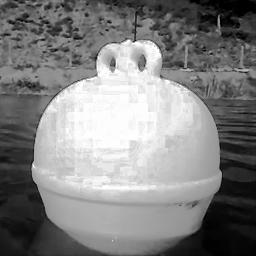

--- 0.12746071815490723 seconds ---
********** 
[0.09960786]
0


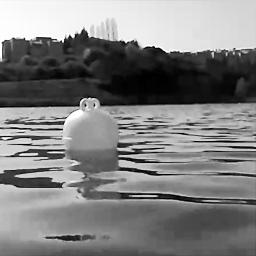

--- 0.09242057800292969 seconds ---
********** 
[0.99855]
1


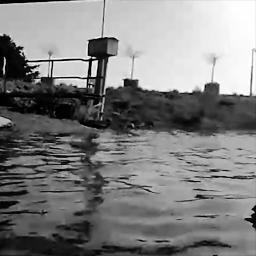

--- 0.09555411338806152 seconds ---
********** 
[0.01760376]
0


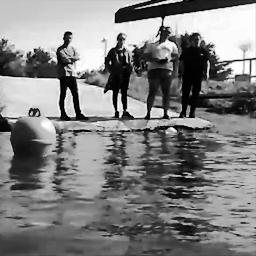

--- 0.13259077072143555 seconds ---
********** 
[0.92736477]
1


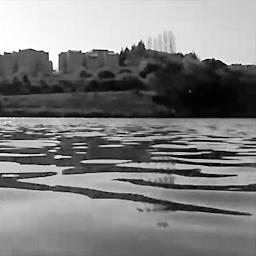

--- 0.10208559036254883 seconds ---
********** 
[0.8518273]
1


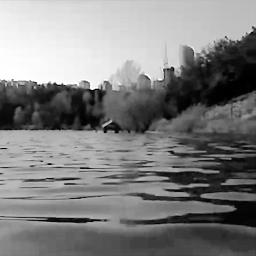

--- 0.13019514083862305 seconds ---
********** 
[0.00091253]
0


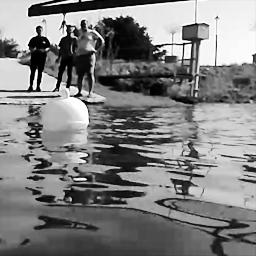

--- 0.0910496711730957 seconds ---
********** 
[0.02939596]
0


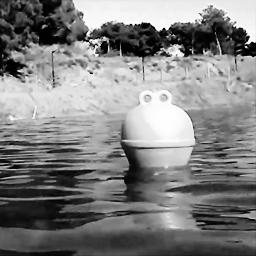

--- 0.09231948852539062 seconds ---
********** 
[1.541845e-06]
0


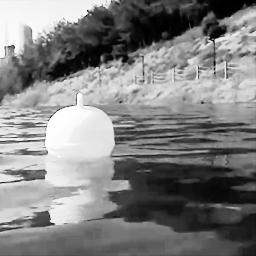

--- 0.10283827781677246 seconds ---
********** 
[0.01032892]
0


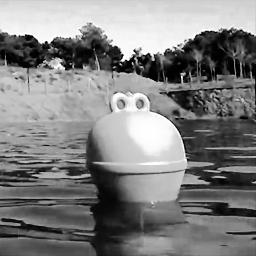

--- 0.10512685775756836 seconds ---
********** 
[0.8579707]
1


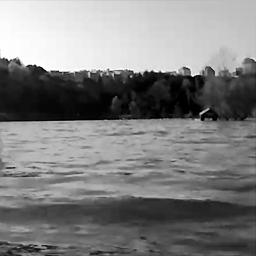

--- 0.0991661548614502 seconds ---
********** 
[0.93803555]
0


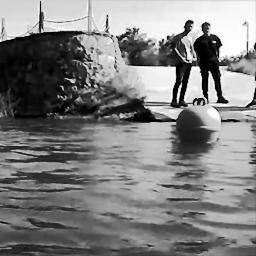

--- 0.09377408027648926 seconds ---
********** 
[0.05391981]
1


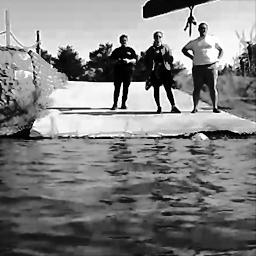

--- 0.11099791526794434 seconds ---
********** 
[0.92958486]
1


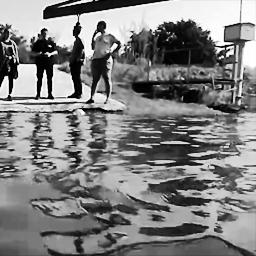

--- 0.11169290542602539 seconds ---
********** 
[0.98143125]
1


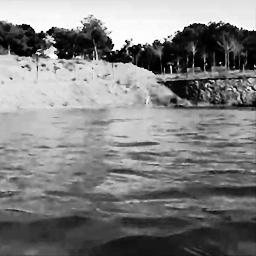

--- 0.09614133834838867 seconds ---
********** 
[9.799456e-07]
0


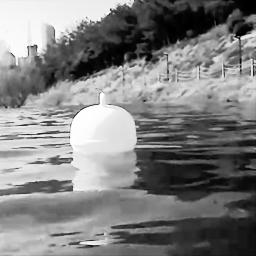

--- 0.09774589538574219 seconds ---
********** 
[0.84948087]
0


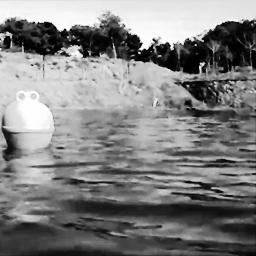

--- 0.10411667823791504 seconds ---
********** 
[0.01279362]
0


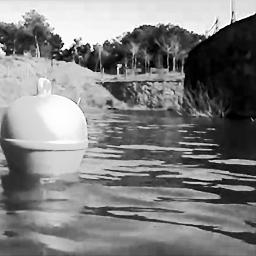

--- 0.09733796119689941 seconds ---
********** 
[0.19298847]
1


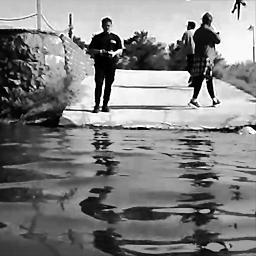

--- 0.10531497001647949 seconds ---
********** 
[0.92736477]
1


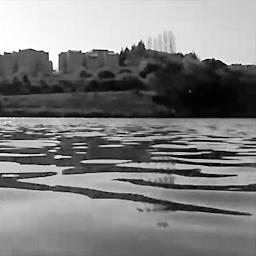

--- 0.11013078689575195 seconds ---
********** 
[0.13330697]
0


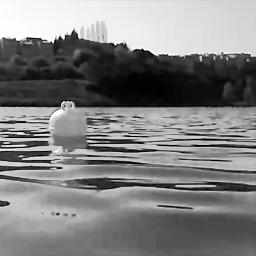

--- 0.09664654731750488 seconds ---


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow

classifier = load_model('/content/buoy_check.h5')
(x_train,y_train), (x_test, y_test) =  data_prep("/content/drive/MyDrive/t_dataset/","buoy")

import time

img_row, img_height, img_depth = 256,256,1



for i in range(0,50):
  start_time = time.time()
  rand = np.random.randint(0,len(x_test))
  input_im = x_test[rand]

  print("********** ")
  imageL=input_im

  input_im=input_im.reshape(1,img_row,img_height,img_depth)
  predict_im=classifier.predict(input_im) 
  print((predict_im[0]))
  print(y_test[rand][0])
  imageL = imageL*255
  cv2_imshow(imageL)
 
  print("--- %s seconds ---" % (time.time() - start_time))


